In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

### DATA UNDERSTANDING AND CLEANING PROCESS FOR VIRAL SOCIAL MEDIA TRENDS DATASET

In [4]:
# Load the dataset
df = pd.read_csv('Viral_Social_Media_Trends.csv')

In [9]:
# Basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB
None


In [12]:
# Statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
           Views     Likes   Shares  Comments
count    5000.00   5000.00  5000.00   5000.00
mean  2494066.44 251475.03 50519.56  24888.39
std   1459489.82 144349.58 29066.36  14284.50
min      1266.00    490.00    52.00     18.00
25%   1186207.25 126892.25 25029.00  12305.25
50%   2497373.00 249443.00 50839.50  25004.00
75%   3759781.00 373970.75 75774.25  37072.75
max   4999430.00 499922.00 99978.00  49993.00


In [15]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64


In [17]:
# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [19]:
# Handle missing values in key columns
# For Content_Type and Platform, fill with the most frequent value
if df['Content_Type'].isnull().sum() > 0:
    most_common_content = df['Content_Type'].mode()[0]
    df['Content_Type'] = df['Content_Type'].fillna(most_common_content)
    print(f"Filled missing Content_Type values with: {most_common_content}")

if df['Platform'].isnull().sum() > 0:
    most_common_platform = df['Platform'].mode()[0]
    df['Platform'] = df['Platform'].fillna(most_common_platform)
    print(f"Filled missing Platform values with: {most_common_platform}")

# For engagement metrics, fill with median values
engagement_metrics = ['Views', 'Likes', 'Shares', 'Comments']
for metric in engagement_metrics:
    if df[metric].isnull().sum() > 0:
        median_value = df[metric].median()
        df[metric] = df[metric].fillna(median_value)
        print(f"Filled missing {metric} values with median: {median_value}")

In [21]:
# Remove duplicates if any
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print(f"Removed duplicate rows. New shape: {df.shape}")


In [23]:
# Convert text columns to lowercase for consistency
text_columns = ['Platform', 'Hashtag', 'Content_Type', 'Region', 'Engagement_Level']
for col in text_columns:
    df[col] = df[col].str.lower()

In [25]:
# Standardize hashtags (remove # symbol if present)
df['Hashtag'] = df['Hashtag'].str.replace('#', '')

In [27]:
# Calculate additional engagement metrics
# Total Engagement
df['Total_Engagement'] = df['Likes'] + df['Shares'] + df['Comments']

In [29]:
# Engagement Rate (as percentage of views)
df['Engagement_Rate'] = (df['Total_Engagement'] / df['Views']) * 100

In [31]:
# Identify outliers using IQR method
numeric_columns = ['Views', 'Likes', 'Shares', 'Comments', 'Total_Engagement', 'Engagement_Rate']
outliers_summary = {}

In [33]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col] = len(outliers)
    
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {100 * len(outliers) / len(df):.2f}%")
    print(f"Range: [{lower_bound:.2f}, {upper_bound:.2f}]")


Column: Views
Number of outliers: 0
Percentage of outliers: 0.00%
Range: [-2674153.38, 7620141.62]

Column: Likes
Number of outliers: 0
Percentage of outliers: 0.00%
Range: [-243725.50, 744588.50]

Column: Shares
Number of outliers: 0
Percentage of outliers: 0.00%
Range: [-51088.88, 151892.12]

Column: Comments
Number of outliers: 0
Percentage of outliers: 0.00%
Range: [-24846.00, 74224.00]

Column: Total_Engagement
Number of outliers: 0
Percentage of outliers: 0.00%
Range: [-170381.62, 822687.38]

Column: Engagement_Rate
Number of outliers: 595
Percentage of outliers: 11.90%
Range: [-21.13, 55.88]


In [35]:
# Final dataset summary
print("\nFinal dataset shape:", df.shape)
print("\nFinal dataset information:")
print(df.info())


Final dataset shape: (5000, 12)

Final dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Post_ID           5000 non-null   object 
 1   Platform          5000 non-null   object 
 2   Hashtag           5000 non-null   object 
 3   Content_Type      5000 non-null   object 
 4   Region            5000 non-null   object 
 5   Views             5000 non-null   int64  
 6   Likes             5000 non-null   int64  
 7   Shares            5000 non-null   int64  
 8   Comments          5000 non-null   int64  
 9   Engagement_Level  5000 non-null   object 
 10  Total_Engagement  5000 non-null   int64  
 11  Engagement_Rate   5000 non-null   float64
dtypes: float64(1), int64(5), object(6)
memory usage: 468.9+ KB
None


In [37]:
# Check if there are any remaining missing values
print("\nRemaining missing values:")
print(df.isnull().sum())


Remaining missing values:
Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
Total_Engagement    0
Engagement_Rate     0
dtype: int64


### EXPLORATORY DATA ANALYSIS

In [40]:
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)


EXPLORATORY DATA ANALYSIS


In [42]:
# 1. Understanding structure and summary statistics
print("\n1. DATASET STRUCTURE AND SUMMARY")
print("-"*30)


1. DATASET STRUCTURE AND SUMMARY
------------------------------


In [44]:
# Count of rows and columns
rows, cols = df.shape
print(f"Dataset dimensions: {rows} rows x {cols} columns")

Dataset dimensions: 5000 rows x 12 columns


In [46]:
# Data types
print("\nData types:")
print(df.dtypes)


Data types:
Post_ID              object
Platform             object
Hashtag              object
Content_Type         object
Region               object
Views                 int64
Likes                 int64
Shares                int64
Comments              int64
Engagement_Level     object
Total_Engagement      int64
Engagement_Rate     float64
dtype: object


In [48]:
# Summary statistics of numeric columns
print("\nSummary statistics of numeric columns:")
print(df.describe())


Summary statistics of numeric columns:
           Views     Likes   Shares  Comments  Total_Engagement  \
count    5000.00   5000.00  5000.00   5000.00           5000.00   
mean  2494066.44 251475.03 50519.56  24888.39         326882.99   
std   1459489.82 144349.58 29066.36  14284.50         148089.98   
min      1266.00    490.00    52.00     18.00          12418.00   
25%   1186207.25 126892.25 25029.00  12305.25         202019.25   
50%   2497373.00 249443.00 50839.50  25004.00         327743.50   
75%   3759781.00 373970.75 75774.25  37072.75         450286.50   
max   4999430.00 499922.00 99978.00  49993.00         635139.00   

       Engagement_Rate  
count          5000.00  
mean             56.76  
std             486.21  
min               0.30  
25%               7.75  
50%              12.91  
75%              27.00  
max           28174.17  


In [50]:
# 2. Count unique values in categorical columns
print("\n2. CATEGORICAL DISTRIBUTIONS")
print("-"*30)


2. CATEGORICAL DISTRIBUTIONS
------------------------------


In [52]:
# Count unique platforms
print(f"\nNumber of unique platforms: {df['Platform'].nunique()}")
print("Platform distribution:")
platform_counts = df['Platform'].value_counts()
print(platform_counts)


Number of unique platforms: 4
Platform distribution:
Platform
youtube      1324
tiktok       1260
instagram    1212
twitter      1204
Name: count, dtype: int64


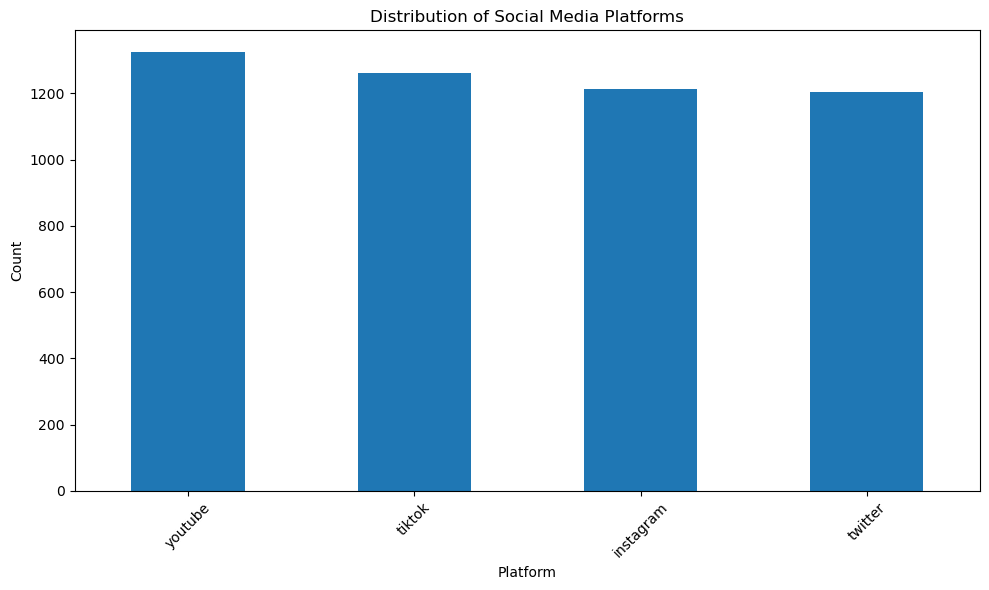

In [54]:
# Visualize platform distribution
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar')
plt.title('Distribution of Social Media Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('platform_distribution.png')
plt.show()
plt.close()

In [57]:
# Count unique hashtags
print(f"\nNumber of unique hashtags: {df['Hashtag'].nunique()}")
print("Top 10 hashtags:")
hashtag_counts = df['Hashtag'].value_counts().head(10)
print(hashtag_counts)


Number of unique hashtags: 10
Top 10 hashtags:
Hashtag
fitness      536
education    525
challenge    507
comedy       505
dance        496
music        493
tech         491
fashion      487
viral        481
gaming       479
Name: count, dtype: int64


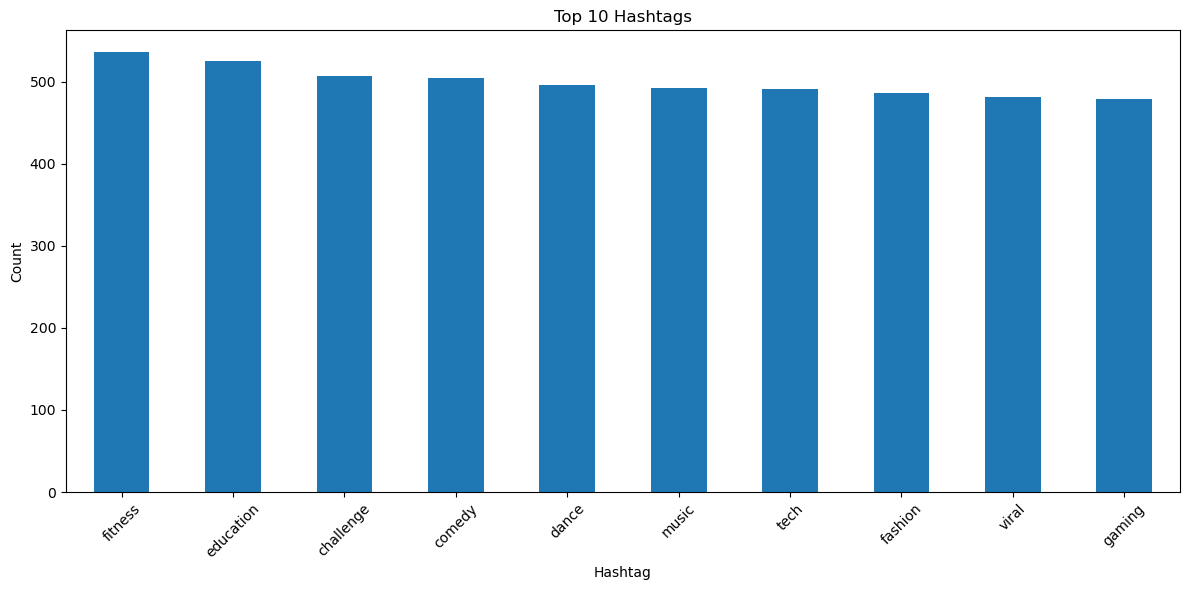

In [59]:
# Visualize top hashtags
plt.figure(figsize=(12, 6))
hashtag_counts.plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_hashtags.png')
plt.show()
plt.close()

In [61]:
# Count unique content types
print(f"\nNumber of unique content types: {df['Content_Type'].nunique()}")
print("Content type distribution:")
content_counts = df['Content_Type'].value_counts()
print(content_counts)


Number of unique content types: 6
Content type distribution:
Content_Type
live stream    855
post           853
reel           841
tweet          836
video          828
shorts         787
Name: count, dtype: int64


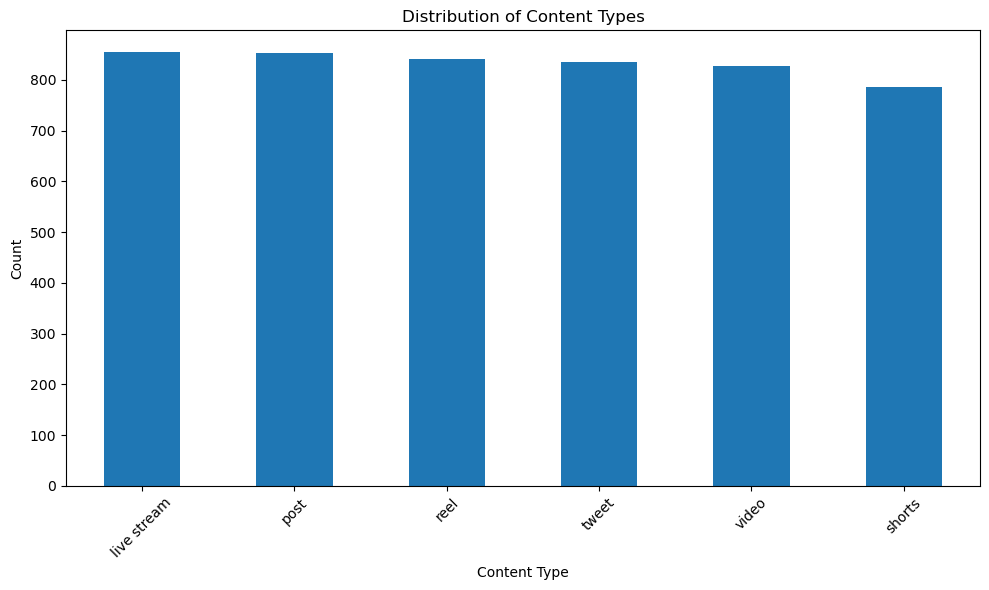

In [63]:
# Visualize content type distribution
plt.figure(figsize=(10, 6))
content_counts.plot(kind='bar')
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('content_type_distribution.png')
plt.show()
plt.close()

In [66]:
# 3. Analyze distributions of engagement metrics
print("\n3. ENGAGEMENT METRICS DISTRIBUTIONS")
print("-"*30)


3. ENGAGEMENT METRICS DISTRIBUTIONS
------------------------------


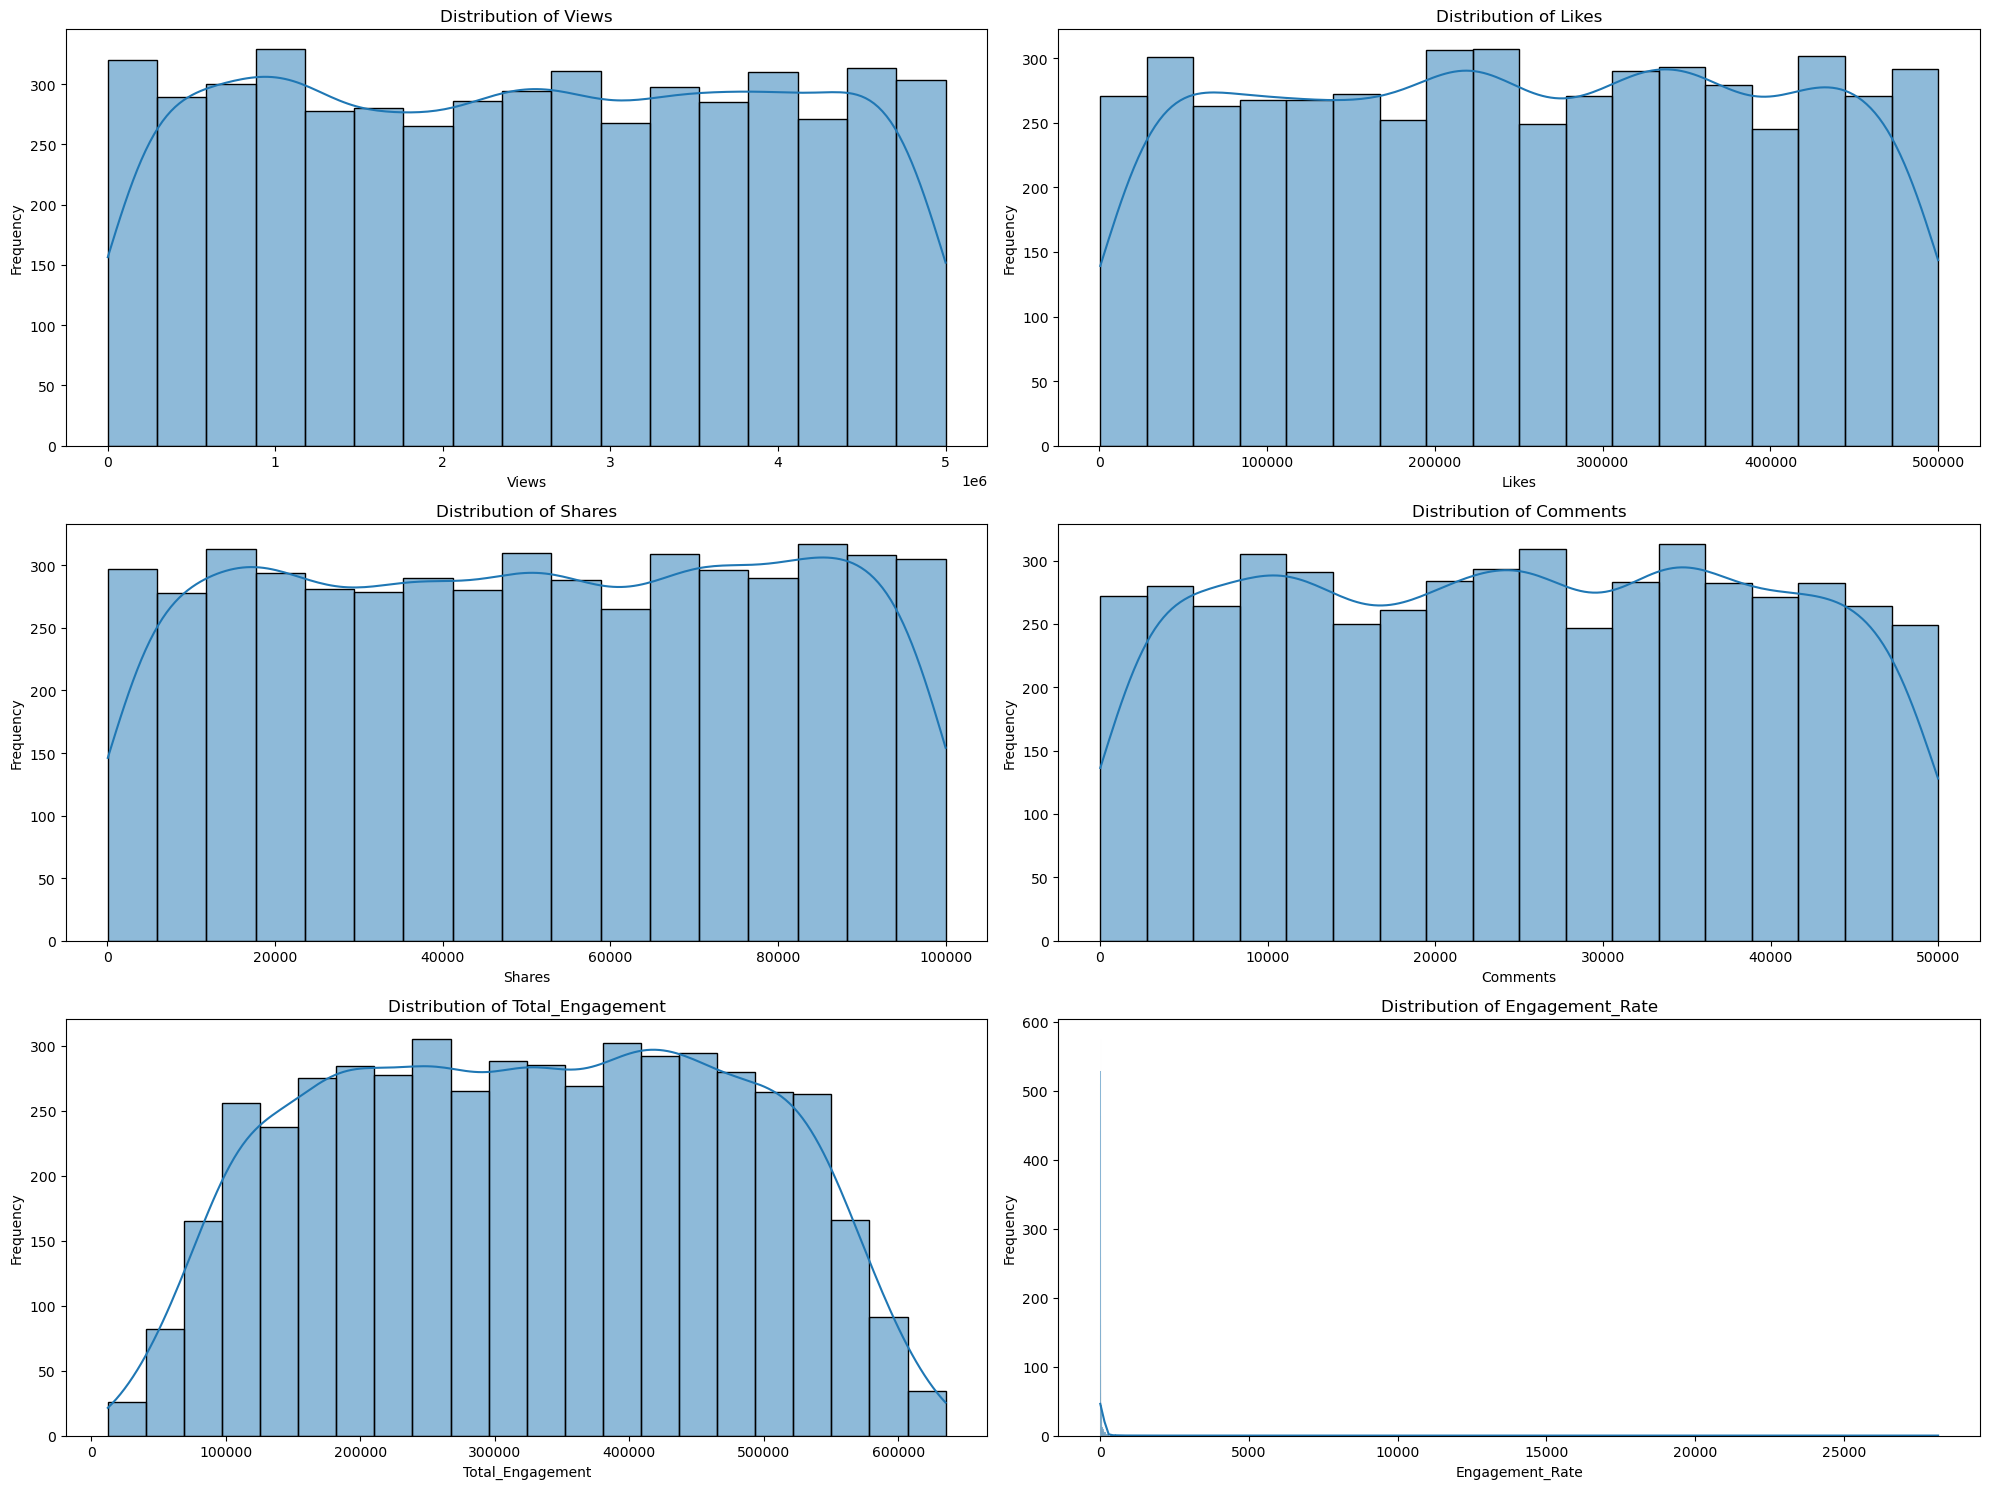

In [68]:
# Create histograms for all engagement metrics
plt.figure(figsize=(20, 15))

for i, metric in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[metric], kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('engagement_distributions.png')
plt.show()
plt.close()

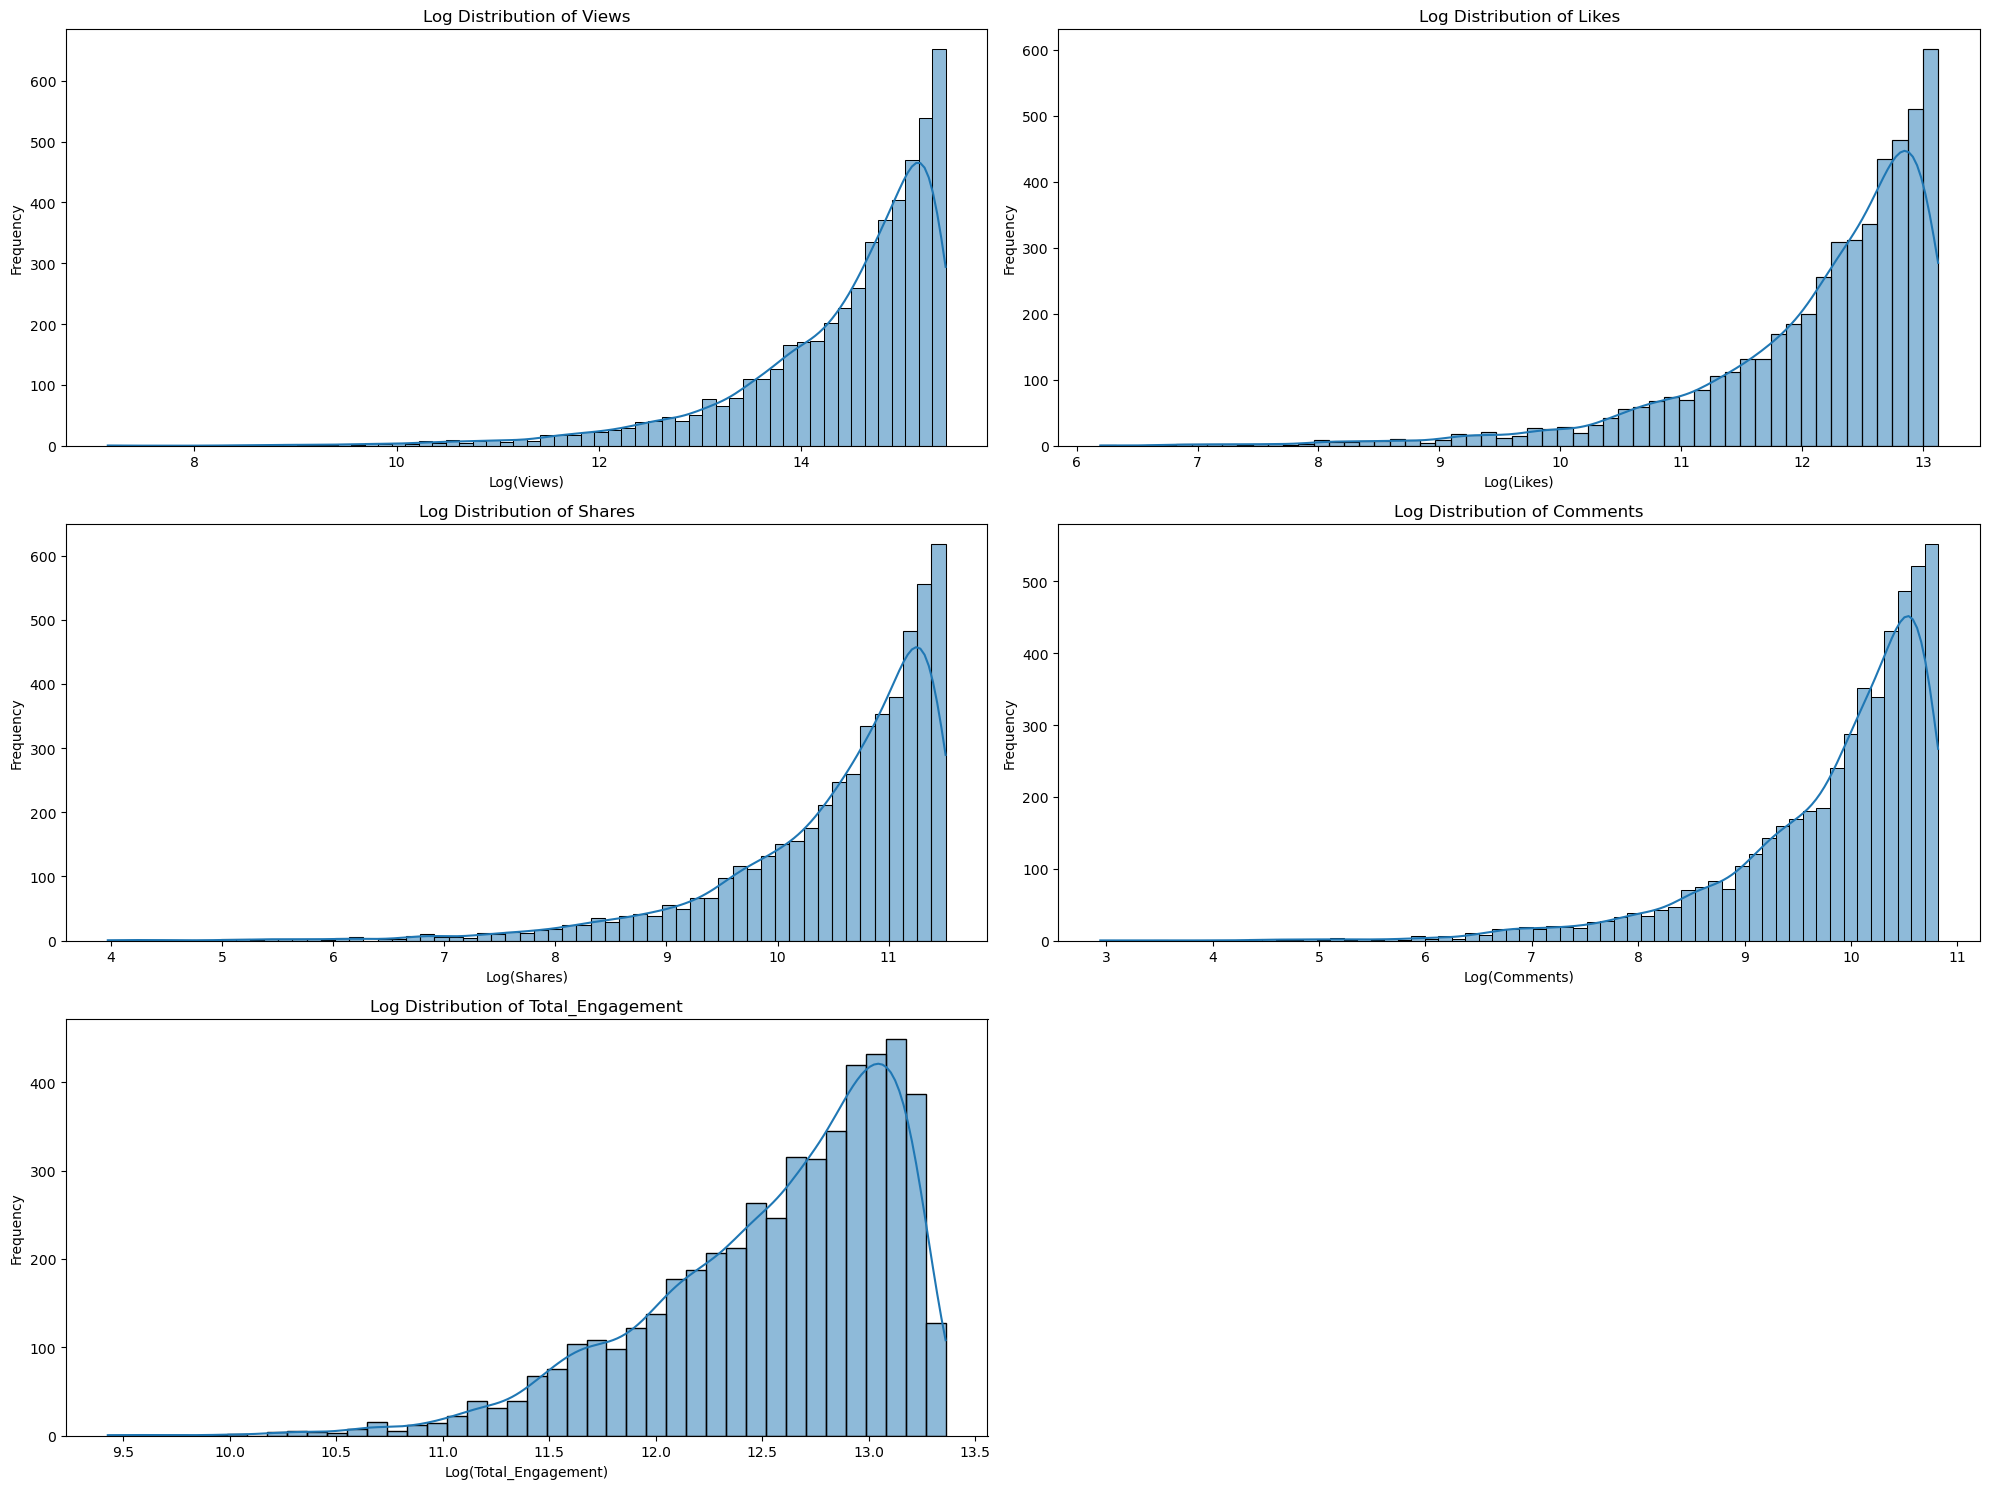

In [69]:
# Log-transformed distributions for better visualization
# Social media metrics often follow power law distributions
plt.figure(figsize=(20, 15))

for i, metric in enumerate(['Views', 'Likes', 'Shares', 'Comments', 'Total_Engagement'], 1):
    plt.subplot(3, 2, i)
    # Add 1 to avoid log(0) issues
    sns.histplot(np.log1p(df[metric]), kde=True)
    plt.title(f'Log Distribution of {metric}')
    plt.xlabel(f'Log({metric})')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
plt.savefig('log_engagement_distributions.png')
plt.close()

In [71]:
# 4. Explore most engaging post types and platforms
print("\n4. MOST ENGAGING CONTENT ANALYSIS")
print("-"*30)


4. MOST ENGAGING CONTENT ANALYSIS
------------------------------


In [72]:
# Average engagement by platform
print("\nAverage engagement metrics by platform:")
platform_engagement = df.groupby('Platform')[numeric_columns].mean().sort_values('Engagement_Rate', ascending=False)
print(platform_engagement)


Average engagement metrics by platform:
               Views     Likes   Shares  Comments  Total_Engagement  \
Platform                                                              
instagram 2404079.88 257118.22 50310.91  24958.11         332387.24   
tiktok    2515015.40 244206.72 51468.26  24778.70         320453.67   
youtube   2545648.40 258314.00 50073.09  25321.39         333708.48   
twitter   2506004.59 245880.12 50227.75  24456.86         320564.73   

           Engagement_Rate  
Platform                    
instagram            66.21  
tiktok               63.87  
youtube              50.64  
twitter              46.54  


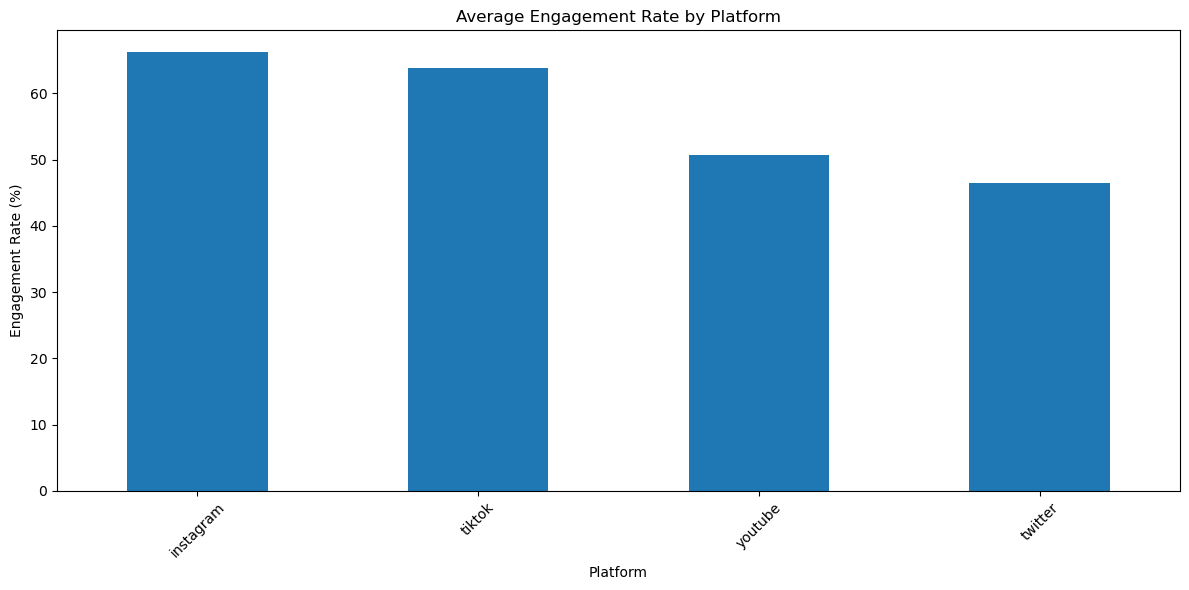

In [73]:
# Visualize platform engagement
plt.figure(figsize=(12, 6))
platform_engagement['Engagement_Rate'].plot(kind='bar')
plt.title('Average Engagement Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('platform_engagement.png')
plt.close()

In [74]:
# Average engagement by content type
print("\nAverage engagement metrics by content type:")
content_engagement = df.groupby('Content_Type')[numeric_columns].mean().sort_values('Engagement_Rate', ascending=False)
print(content_engagement)


Average engagement metrics by content type:
                  Views     Likes   Shares  Comments  Total_Engagement  \
Content_Type                                                             
shorts       2486350.72 247926.20 49593.95  25060.41         322580.57   
live stream  2481009.01 248811.62 49921.96  25167.64         323901.21   
tweet        2500386.93 249384.47 51427.45  24635.99         325447.91   
post         2474337.32 252784.17 50164.20  24554.97         327503.34   
video        2489008.86 254768.92 50614.39  24694.61         330077.93   
reel         2533268.68 255011.07 51357.87  25223.41         331592.34   

              Engagement_Rate  
Content_Type                   
shorts                  80.63  
live stream             61.88  
tweet                   52.07  
post                    49.81  
video                   48.82  
reel                    48.75  


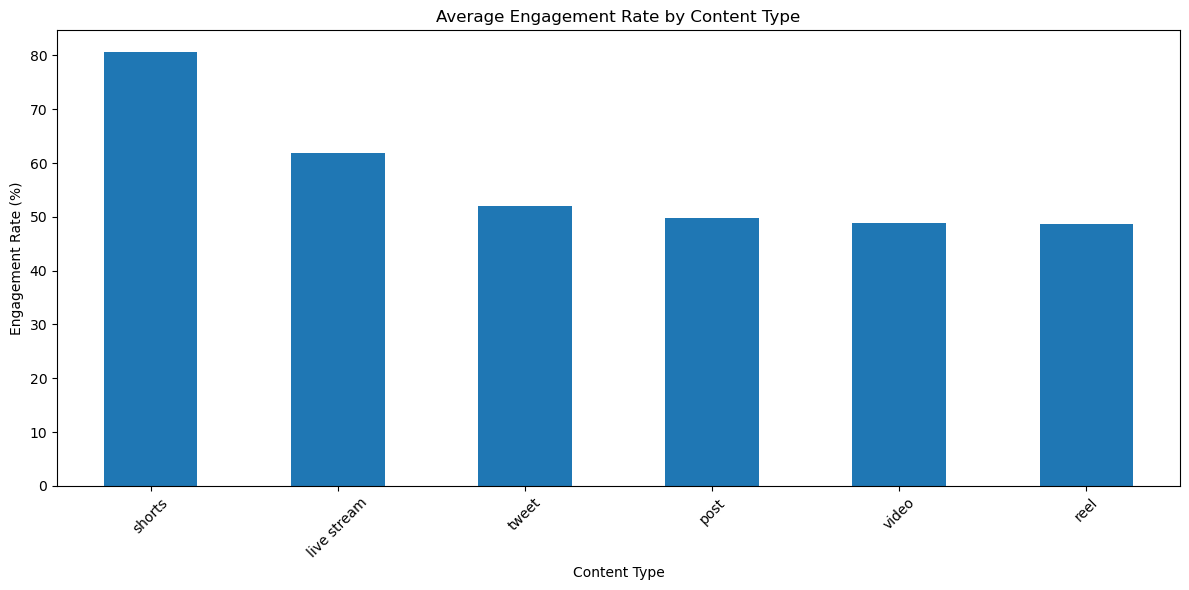

In [75]:
# Visualize content type engagement
plt.figure(figsize=(12, 6))
content_engagement['Engagement_Rate'].plot(kind='bar')
plt.title('Average Engagement Rate by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('content_engagement.png')
plt.close()

In [76]:
# Average engagement by hashtag (top 10)
print("\nAverage engagement metrics by top hashtags:")
hashtag_engagement = df.groupby('Hashtag')[numeric_columns].mean().sort_values('Engagement_Rate', ascending=False).head(10)
print(hashtag_engagement)


Average engagement metrics by top hashtags:
               Views     Likes   Shares  Comments  Total_Engagement  \
Hashtag                                                               
viral     2437590.28 249964.49 50428.89  24776.51         325169.90   
comedy    2450141.71 253615.75 49418.05  24798.89         327832.68   
gaming    2500698.95 242819.59 51360.82  25332.24         319512.65   
fitness   2599391.00 253130.12 51183.12  24532.69         328845.94   
tech      2516381.46 260347.15 48287.21  25799.55         334433.91   
education 2531227.84 260423.42 51748.70  24684.92         336857.05   
fashion   2426830.62 249970.58 50956.94  24206.32         325133.85   
dance     2447362.77 254484.89 49557.96  24565.04         328607.89   
challenge 2451335.16 241212.44 51182.43  25207.85         317602.72   
music     2568758.78 248012.82 50965.63  25024.50         324002.94   

           Engagement_Rate  
Hashtag                     
viral               100.47  
comedy         

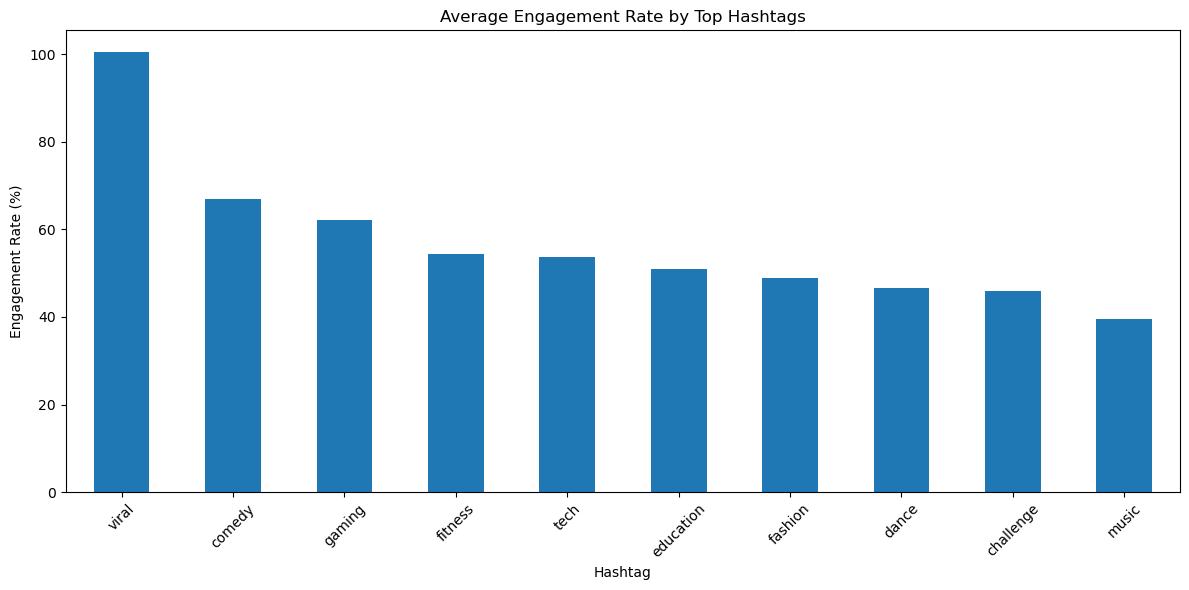

In [78]:
# Visualize hashtag engagement
plt.figure(figsize=(12, 6))
hashtag_engagement['Engagement_Rate'].plot(kind='bar')
plt.title('Average Engagement Rate by Top Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('hashtag_engagement.png')
plt.close()

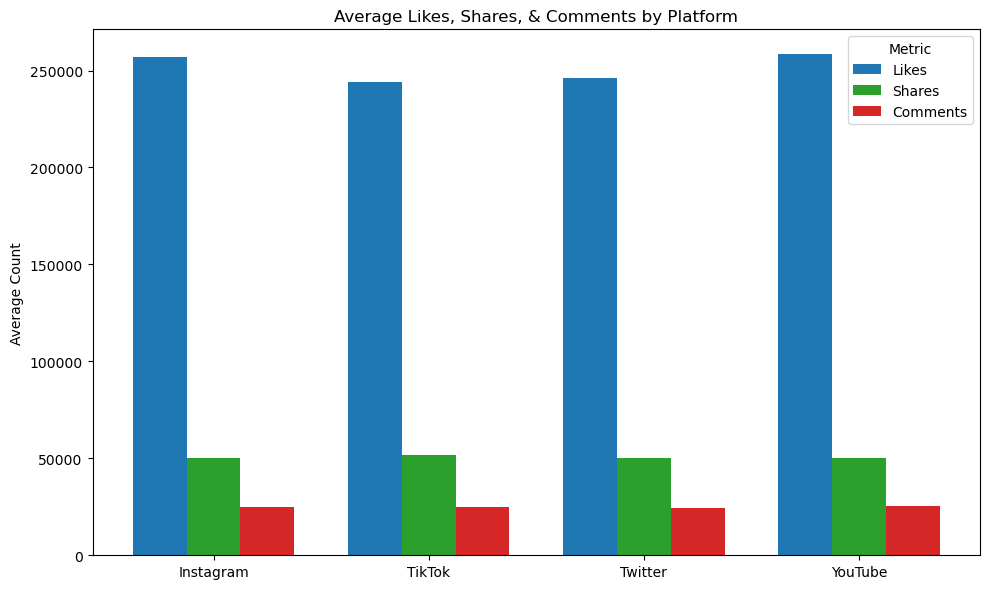

In [132]:
# Load and group the data
df = pd.read_csv('Viral_Social_Media_Trends.csv')
df_avg = df.groupby('Platform')[['Likes', 'Shares', 'Comments']].mean().reset_index()

# Prepare data
labels = df_avg['Platform']
likes = df_avg['Likes']
shares = df_avg['Shares']
comments = df_avg['Comments']
x = np.arange(len(labels))
width = 0.25

# Use distinct colors for each metric
color_likes = '#1f77b4'     # blue
color_shares = '#2ca02c'    # green
color_comments = '#d62728'  # red

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, likes, width, label='Likes', color=color_likes)
ax.bar(x, shares, width, label='Shares', color=color_shares)
ax.bar(x + width, comments, width, label='Comments', color=color_comments)

# Final touches
ax.set_ylabel('Average Count')
ax.set_title('Average Likes, Shares, & Comments by Platform')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Metric')

plt.tight_layout()
plt.show()


In [88]:
# 5. Platform and Content Type Analysis
print("\n5. PLATFORM AND CONTENT TYPE RELATIONSHIPS")
print("-"*30)


5. PLATFORM AND CONTENT TYPE RELATIONSHIPS
------------------------------


In [90]:
# Create a heatmap of platform vs content type counts
platform_content_counts = pd.crosstab(df['Platform'], df['Content_Type'])
print("\nPlatform vs Content Type counts:")
print(platform_content_counts)


Platform vs Content Type counts:
Content_Type  live stream  post  reel  shorts  tweet  video
Platform                                                   
instagram             211   191   214     196    188    212
tiktok                207   203   210     208    218    214
twitter               206   221   202     166    211    198
youtube               231   238   215     217    219    204


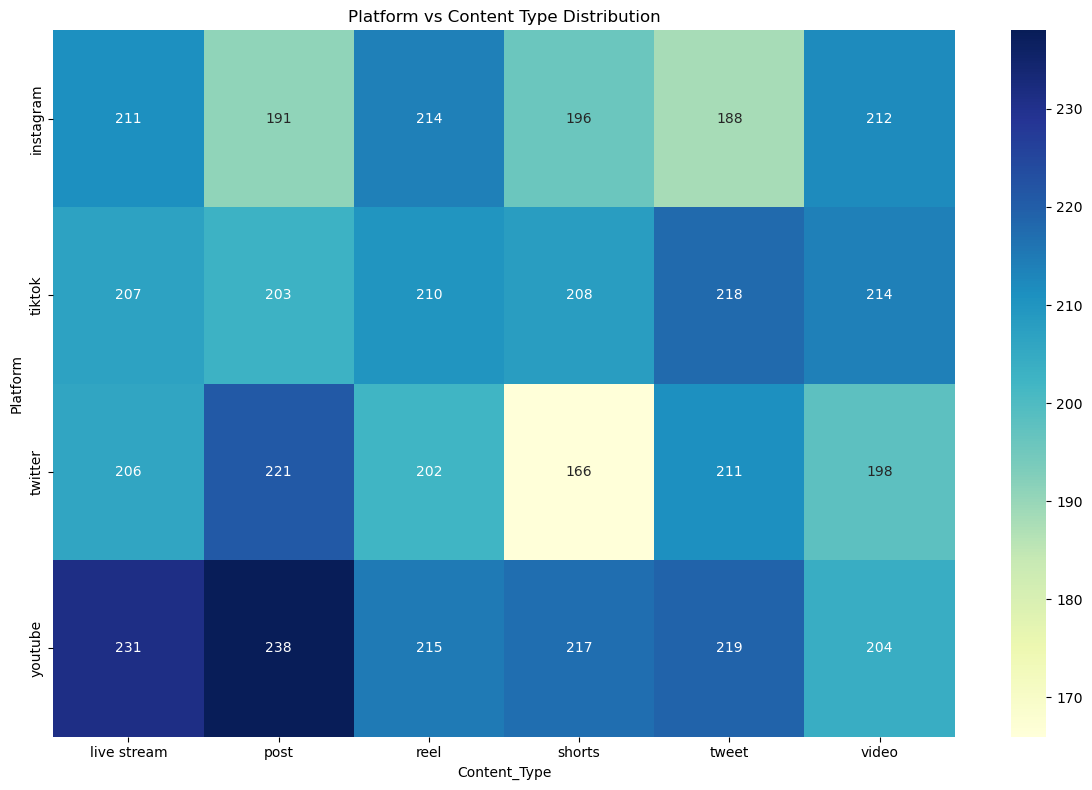

In [92]:
# Visualize as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(platform_content_counts, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Platform vs Content Type Distribution')
plt.tight_layout()
plt.show()
plt.savefig('platform_content_heatmap.png')
plt.close()

In [95]:
# Create a heatmap of average engagement rate by platform and content type
platform_content_engagement = df.pivot_table(
    index='Platform', 
    columns='Content_Type', 
    values='Engagement_Rate', 
    aggfunc='mean'
)
print("\nAverage engagement rate by platform and content type:")
print(platform_content_engagement)


Average engagement rate by platform and content type:
Content_Type  live stream  post  reel  shorts  tweet  video
Platform                                                   
instagram           93.34 53.64 67.87   69.01  83.43  30.98
tiktok              30.95 39.66 32.56  168.91  44.70  66.83
twitter             32.75 43.98 45.90   54.16  46.73  57.82
youtube             86.83 60.79 48.23   26.74  37.62  39.72


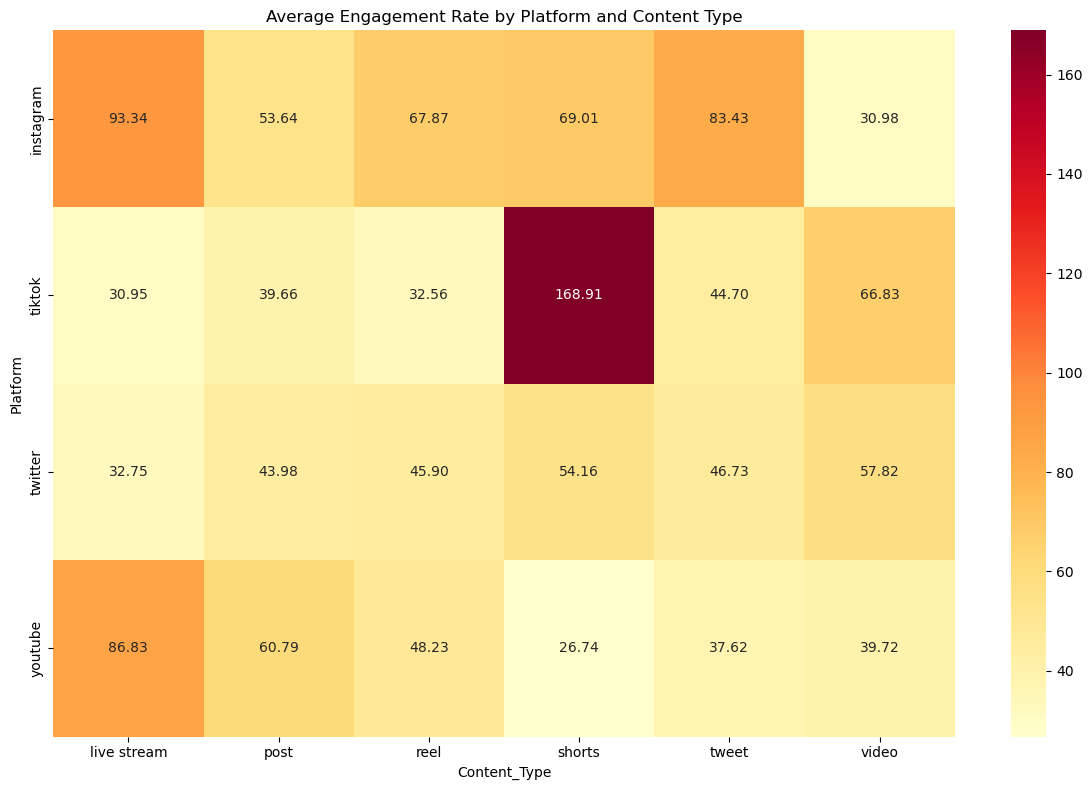

In [97]:
# Visualize as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(platform_content_engagement, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Engagement Rate by Platform and Content Type')
plt.tight_layout()
plt.show()
plt.savefig('platform_content_engagement_heatmap.png')
plt.close()

In [100]:
# 6. Top performing posts
print("\n6. TOP PERFORMING POSTS")
print("-"*30)

# Top 10 posts by total engagement
print("\nTop 10 posts by total engagement:")
top_engagement = df.sort_values('Total_Engagement', ascending=False).head(10)
print(top_engagement[['Post_ID', 'Platform', 'Content_Type', 'Hashtag', 'Total_Engagement', 'Views']])

# Top 10 posts by engagement rate
print("\nTop 10 posts by engagement rate:")
top_rate = df.sort_values('Engagement_Rate', ascending=False).head(10)
print(top_rate[['Post_ID', 'Platform', 'Content_Type', 'Hashtag', 'Engagement_Rate', 'Views']])


6. TOP PERFORMING POSTS
------------------------------

Top 10 posts by total engagement:
        Post_ID   Platform Content_Type    Hashtag  Total_Engagement    Views
2907  Post_2908  instagram  live stream  challenge            635139  4498056
4960  Post_4961  instagram        tweet       tech            630930  2964544
3619  Post_3620    youtube         reel      dance            630822  3371356
1871  Post_1872  instagram       shorts       tech            630436   301575
556    Post_557  instagram         post    fitness            627178   129205
2864  Post_2865  instagram         reel      viral            626538  1831119
4759  Post_4760    youtube        tweet      music            625382  2050005
2492  Post_2493    twitter         reel    fashion            624224  3802774
3016  Post_3017    twitter        tweet    fashion            622586  1072473
8        Post_9    twitter  live stream  education            622293  2169523

Top 10 posts by engagement rate:
        Post_ID  

In [102]:
# Final dataset summary
print("\nFinal dataset shape:", df.shape)
print("\nFinal dataset information:")
print(df.info())
# Justification: After all transformations, it's important to review the final
# dataset structure to ensure all changes were applied as expected.


Final dataset shape: (5000, 12)

Final dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Post_ID           5000 non-null   object 
 1   Platform          5000 non-null   object 
 2   Hashtag           5000 non-null   object 
 3   Content_Type      5000 non-null   object 
 4   Region            5000 non-null   object 
 5   Views             5000 non-null   int64  
 6   Likes             5000 non-null   int64  
 7   Shares            5000 non-null   int64  
 8   Comments          5000 non-null   int64  
 9   Engagement_Level  5000 non-null   object 
 10  Total_Engagement  5000 non-null   int64  
 11  Engagement_Rate   5000 non-null   float64
dtypes: float64(1), int64(5), object(6)
memory usage: 468.9+ KB
None


In [104]:
# Check if there are any remaining missing values
print("\nRemaining missing values:")
print(df.isnull().sum())
# Justification: Confirming no missing values remain ensures that the dataset
# is complete and ready for analysis. This is a final quality check.


Remaining missing values:
Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
Total_Engagement    0
Engagement_Rate     0
dtype: int64


In [106]:
# Save the cleaned dataset
df.to_csv('Viral_Social_Media_Trends_Cleaned.csv', index=False)
print("Cleaned dataset saved as 'Viral_Social_Media_Trends_Cleaned.csv'")
# Justification: Saving the cleaned dataset preserves the work done and creates
# a clean version for further analysis. Not including the index (index=False)
# avoids adding an unnecessary column to the saved file. 

Cleaned dataset saved as 'Viral_Social_Media_Trends_Cleaned.csv'


In [114]:
import pandas as pd
import plotly.express as px

# Load the Viral Social Media Trends dataset
df_trends = pd.read_csv('Viral_Social_Media_Trends.csv')

# Display first few rows
df_trends.head()

Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium

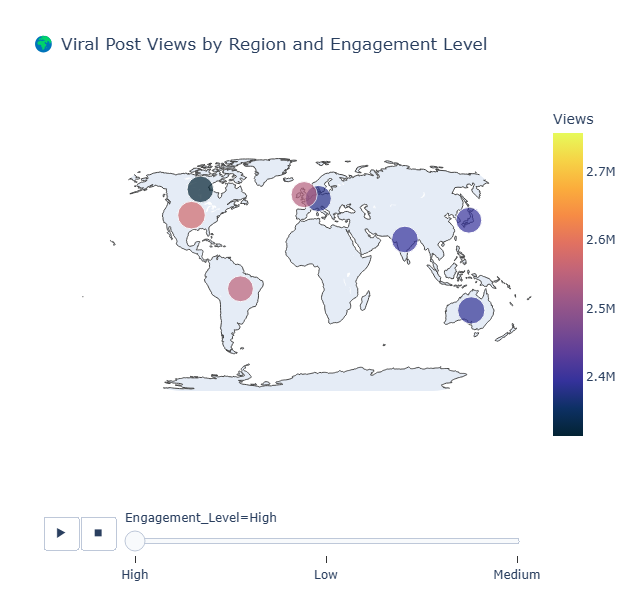

In [116]:

# Group data for Geo Map
df_geo = df_trends.groupby(['Region', 'Engagement_Level']).agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Shares': 'mean',
    'Comments': 'mean'
}).reset_index()

# Animated Scatter Geo Map
fig_geo = px.scatter_geo(df_geo,
                         locations="Region",
                         locationmode='country names',
                         color="Views",
                         hover_name="Region",
                         size="Likes",
                         animation_frame="Engagement_Level",
                         projection="natural earth",
                         title='🌍 Viral Post Views by Region and Engagement Level',
                         color_continuous_scale="thermal",
                         range_color=(df_geo['Views'].min(), df_geo['Views'].max()),
                         height=600)

fig_geo.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig_geo.show()


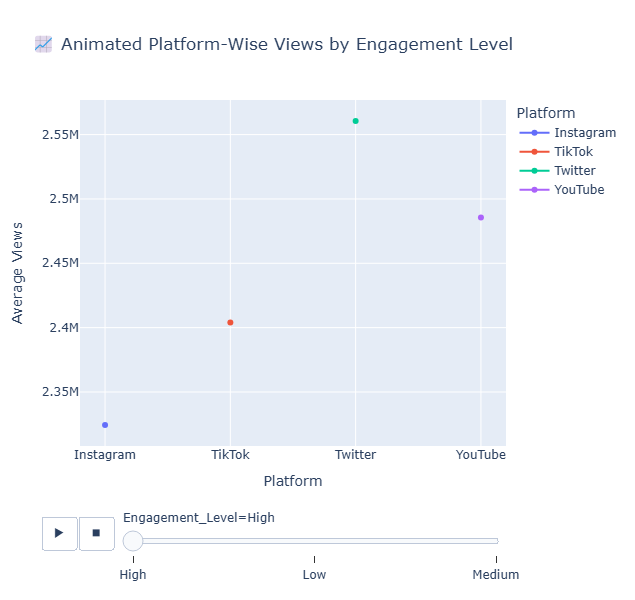

In [118]:

# Group data for Line Chart
df_line = df_trends.groupby(['Platform', 'Engagement_Level']).agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Shares': 'mean',
    'Comments': 'mean'
}).reset_index()

# Animated Line Chart
fig_line = px.line(df_line,
                   x='Platform',
                   y='Views',
                   color='Platform',
                   animation_frame='Engagement_Level',
                   markers=True,
                   title='📈 Animated Platform-Wise Views by Engagement Level',
                   labels={'Views': 'Average Views'},
                   height=600)

fig_line.update_layout(transition={'duration': 500})
fig_line.show()


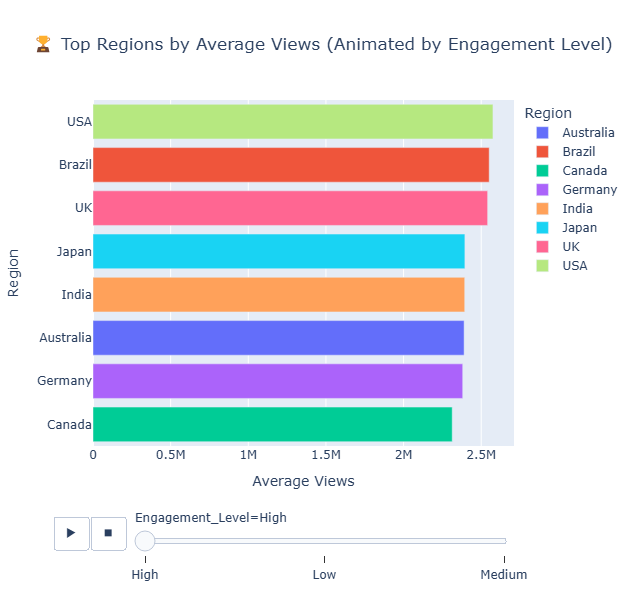

In [120]:

# Animated Bar Chart
fig_bar = px.bar(df_geo,
                 x='Views',
                 y='Region',
                 color='Region',
                 orientation='h',
                 animation_frame='Engagement_Level',
                 title='🏆 Top Regions by Average Views (Animated by Engagement Level)',
                 labels={'Views': 'Average Views'},
                 height=600)

fig_bar.update_layout(transition={'duration': 500}, yaxis={'categoryorder':'total ascending'})
fig_bar.show()


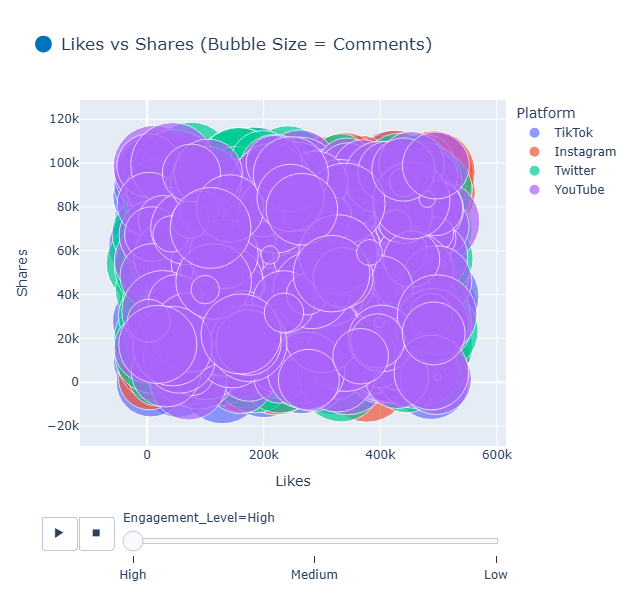

In [122]:

# Animated Bubble Chart
fig_bubble = px.scatter(df_trends,
                        x='Likes',
                        y='Shares',
                        size='Comments',
                        color='Platform',
                        hover_name='Post_ID',
                        animation_frame='Engagement_Level',
                        title='🔵 Likes vs Shares (Bubble Size = Comments)',
                        size_max=60,
                        height=600)

fig_bubble.update_layout(transition={'duration': 500})
fig_bubble.show()


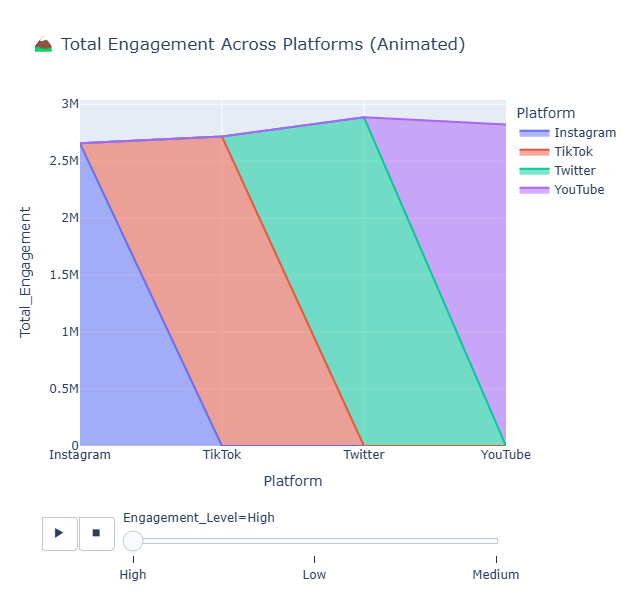

In [126]:

# Prepare data for Area Chart
df_trends['Total_Engagement'] = df_trends['Views'] + df_trends['Likes'] + df_trends['Shares'] + df_trends['Comments']
df_area = df_trends.groupby(['Platform', 'Engagement_Level']).agg({
    'Total_Engagement': 'mean'
}).reset_index()

# Animated Area Chart
fig_area = px.area(df_area,
                   x='Platform',
                   y='Total_Engagement',
                   color='Platform',
                   animation_frame='Engagement_Level',
                   title='🏔️ Total Engagement Across Platforms (Animated)',
                   height=600)

fig_area.update_layout(transition={'duration': 500})
fig_area.show()
